# Tarea 7. Optimización
Guillermo Segura Gómez

## Ejercicio 1

Programar el método de Newton truncado descrito en el Algoritmo 1 y 2 de la Clase 20.
   
1. Programar la función que implementa el Algoritmo 1, que calcula una aproximación
   de la solución del sistema de Newton. 
- Haga que la función devuelva la dirección $\mathbf{p}_k$ y el número de iteraciones realizadas.

In [1]:
# Librerias
import numpy as np
import matplotlib.pyplot as plt

In [48]:
def GradConj2NewtonSystem(Hk, gk, dimN, ek):
    z0 = np.zeros(dimN)
    r0 = gk
    d0 = -r0

    for i in range(dimN):

        # Condicion de indefinicion
        if (d0.T @ Hk @ d0) <= 0:
            
            if i == 0:
                return -gk, i
            else:
                return z0, i
            
        # Calculo de alpha
        alpha0 = (r0.T @ r0) / (d0.T @ Hk @ d0)

        # Calculo de los valores siguientes
        z1 = z0 + alpha0 * d0
        r1 = r0 + alpha0 * Hk @ d0
        beta1 = (r1.T @ r1) / (r0.T @ r0)
        d1 = -r1 + beta1 * d0

        # Condicion de paro
        if np.linalg.norm(r1) < ek:
            return z1, i
        
        # Actualizacion de valores
        z0 = z1
        r0 = r1
        d0 = d1
    
    return z0, dimN

2. Programar la función que implementa el Algoritmo 2. 
- Use el algoritmo de backtracking con la condición de descenso suficiente para 
  calcular el tamaño de paso $\alpha_k$.
- Defina la variable binaria $res$ de modo que $True$ si se cumple la condición de salida
  $\|\mathbf{g}_k\|<\tau$ y $False$ si termina por iteraciones.
- Calcule el promedio de las iteraciones realizadas por el Algoritmo 1 
- Haga que la función devuelva $\mathbf{x}_k, \mathbf{g}_k, k, res$ y el
  promedio de la iteraciones realizadas por el Algoritmo 1.

In [49]:
def Backtracking_DescSuf(alpha_0, rho, c1, xk, fk, gk, pk, nMax):

    for i in range(nMax):

        comp1 = fk(xk + alpha_0*pk)
        comp2 = fk(xk) + c1*alpha_0* np.dot(gk, pk)

        if (comp1 <= comp2):
            return alpha_0, i

        alpha_0 = alpha_0*rho

    return alpha_0, i

In [89]:
def NewtonTruncado(f, gradf, hessf, x0, tau, nMax, alpha_0, rho, c1, nBack):
    # Hacemos la dimension de x0
    dim = len(x0)

    xk = np.array(x0)
    sequence = []
    sequenceNiter = []

    for k in range(nMax):
        # Calculamos el gradiente y la hessiana
        gk = gradf(xk)

        # Convergenica
        if np.linalg.norm(gk) < tau:
            return xk, k, gk, True, sequence, sequenceNiter
        
        # Calculamos la hessiana
        Hk = hessf(xk)

        # Calculamos la tolerancia ek
        ek = min(1/2, np.linalg.norm(gk)**(1/2)) * np.linalg.norm(gk)

        # Obtenemos pk de GradConj2NewtonSystem
        pk, niter = GradConj2NewtonSystem(Hk, gk, dim, ek)

        # Calculamos el tamaño de paso
        alphak, _ = Backtracking_DescSuf(alpha_0, rho, c1, xk, f, gk, pk, nBack)

        # Actualizamos xk
        xk = xk + alphak * pk

        # Almacenar puntos solo para visualización en 2D
        if len(x0) == 2:
            sequence.append(xk.tolist())
        
        # Almacenar niter
        if niter != 0: sequenceNiter.append(niter)

    return xk, nMax, gk, False, sequence, sequenceNiter # No se alcanzó la convergencia dentro de nMax

3. Pruebe el algoritmo para minimizar las siguientes funciones usando los parámetros
   $N=5000$, $\tau = \sqrt{n}\epsilon_m^{1/3}$, donde $n$ es la dimensión
   de la variable $\mathbf{x}$ y $\epsilon_m$ es el épsilon máquina. 
   Para backtracking use $\rho=0.5$, $c_1=0.001$ y el número máximo de iteraciones $N_b=500$.
   
   En cada caso imprima los siguientes datos:
   
- la dimensión $n$,
- $f(\mathbf{x}_0)$,
- el  número $k$ de iteraciones realizadas,
- $f(\mathbf{x}_k)$,
- las primeras y últimas 4 entradas del punto $\mathbf{x}_k$ que devuelve el algoritmo,
- la norma del vector gradiente $\mathbf{g}_k$, 
- el promedio del número de iteraciones realizadas por el Algoritmo 1.
- la variable $res$ para saber si el algoritmo puedo converger.
  


**Función de cuadrática 1:** Para $\mathbf{x}=(x_1,x_2, ..., x_n)$

- $f(\mathbf{x}) = \frac{1}{2} \mathbf{x}^\top\mathbf{A}_1\mathbf{x} - \mathbf{b}_1^\top\mathbf{x}$,
  donde $\mathbf{A}_1$ y $\mathbf{b}_1$ están definidas por
  

$$ \mathbf{A}_1 = n\mathbf{I} + \mathbf{1} = 
\left[\begin{array}{llll} n      & 0      & \cdots & 0 \\
                       0      & n      & \cdots & 0 \\ 
                       \vdots & \vdots & \ddots & \vdots \\
                       0      & 0      & \cdots & n \end{array}\right]
+ \left[\begin{array}{llll} 1    & 1      & \cdots & 1 \\
                       1      & 1      & \cdots & 1 \\ 
                       \vdots & \vdots & \ddots & \vdots \\
                       1      & 1      & \cdots & 1 \end{array}\right],  \qquad
\mathbf{b}_1 = \left[\begin{array}{l} 1 \\ 1 \\ \vdots \\ 1 \end{array}\right], $$

donde $\mathbf{I}$ es la matriz identidad y $\mathbf{1}$ es la matriz llena de 1's,
ambas de tamaño $n$, usando los puntos iniciales   
- $\mathbf{x}_0 = (0,...,0)\in \mathbb{R}^{10}$ 
- $\mathbf{x}_0 = (0,...,0)\in \mathbb{R}^{100}$ 
- $\mathbf{x}_0 = (0,...,0)\in \mathbb{R}^{1000}$ 

---

**Función de cuadrática 2:** Para $\mathbf{x}=(x_1,x_2, ..., x_n)$

- $f(\mathbf{x}) = \frac{1}{2} \mathbf{x}^\top\mathbf{A}_2\mathbf{x} - \mathbf{b}_2^\top\mathbf{x}$,
  donde $\mathbf{A}_2= [a_{ij}]$ y $\mathbf{b}_2$ están definidas por
  
$$ a_{ij} = exp\left(-0.25(i-j)^2 \right),  \qquad
\mathbf{b}_2 = \left[\begin{array}{l} 1 \\ 1 \\ \vdots \\ 1 \end{array}\right] $$

usando los puntos iniciales:
- $\mathbf{x}_0 = (0,...,0)\in \mathbb{R}^{10}$ 
- $\mathbf{x}_0 = (0,...,0)\in \mathbb{R}^{100}$ 
- $\mathbf{x}_0 = (0,...,0)\in \mathbb{R}^{1000}$ 

---

**Función de Beale :** Para $\mathbf{x}=(x_1,x_2)$

$$f(\mathbf{x}) = (1.5-x_1 + x_1x_2)^2 + (2.25 - x_1 + x_1x_2^2)^2 + (2.625 - x_1 + x_1x_2^3)^2.$$
- $\mathbf{x}_0 = (2,3)$  
   
---

**Función de Himmelblau:** Para $\mathbf{x}=(x_1,x_2)$

$$f(\mathbf{x}) = (x_1^2 + x_2 - 11)^2 + (x_1 + x_2^2 - 7)^2. $$
- $\mathbf{x}_0 = (2,4)$

---

**Función de Rosenbrock:** Para $\mathbf{x}=(x_1,x_2, ..., x_n)$

$$ f(\mathbf{x}) = \sum_{i=1}^{n-1} \left[100(x_{i+1} - x_i^2)^2 + (1-x_i)^2 \right]
\quad n\geq 2.$$
- $\mathbf{x}_0 = (-1.2, 1.0)\in \mathbb{R}^{2}$  
- $\mathbf{x}_0 = (-1.2, 1.0, ..., -1.2, 1.0) \in \mathbb{R}^{20}$  
- $\mathbf{x}_0 = (-1.2, 1.0, ..., -1.2, 1.0) \in \mathbb{R}^{40}$ 

---

Definimos las funciones a probar

In [90]:
def himmelblau(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

def grad_himmelblau(x):
    df_dx1 = 4 * x[0] * (x[0]**2 + x[1] - 11) + 2 * (x[0] + x[1]**2 - 7)
    df_dx2 = 2 * (x[0]**2 + x[1] - 11) + 4 * x[1] * (x[0] + x[1]**2 - 7)
    return np.array([df_dx1, df_dx2])

def hessian_himmelblau(x):
    H11 = 12*x[0]**2 + 4*x[1] - 42
    H12 = 4*x[0] + 4*x[1]
    H21 = H12  # La matriz es simétrica, por lo que H21 = H12
    H22 = 12*x[1]**2 + 4*x[0] - 26
    H = np.array([[H11, H12], [H21, H22]])
    return H

In [91]:
def beale(x):
    return ((1.5 - x[0] + x[0]*x[1])**2 + 
            (2.25 - x[0] + x[0]*x[1]**2)**2 + 
            (2.625 - x[0] + x[0]*x[1]**3)**2)

def grad_beale(x):
    x1, x2 = x
    df_dx1 = 2*(1.5 - x1 + x1*x2)*(-1 + x2) + 2*(2.25 - x1 + x1*x2**2)*(-1 + x2**2) + 2*(2.625 - x1 + x1*x2**3)*(-1 + x2**3)
    df_dx2 = 2*(1.5 - x1 + x1*x2)*x1 + 2*(2.25 - x1 + x1*x2**2)*2*x1*x2 + 2*(2.625 - x1 + x1*x2**3)*3*x1*x2**2
    return np.array([df_dx1, df_dx2])


def hessian_beale(x):
    x1, x2 = x[0], x[1]
    
    H11 = 2 * ((-1 + x2) ** 2) + 2 * ((-1 + x2 ** 2) ** 2) + 2 * ((-1 + x2 ** 3) ** 2)
    H12 = (2 * x1 * (-1 + x2) + 2 * (1.5 - x1 + x1 * x2) + 
            4 * x1 * x2 * (-1 + x2 ** 2) + 4 * x2 * (2.25 - x1 + x1 * x2 ** 2) + 
            6 * x1 * x2 ** 2 * (-1 + x2 ** 3) + 6 * x2 ** 2 * (2.625 - x1 + x1 * x2 ** 3))
    H21 = H12  
    H22 = (2 * x1 ** 2 + 8 * x1 ** 2 * x2 ** 2 + 18 * x1 ** 2 * x2 ** 4 + 
           4 * x1 * (2.25 - x1 + x1 * x2 ** 2) + 12 * x1 * x2 * (2.625 - x1 + x1 * x2 ** 3))

    H = np.array([[H11, H12], [H21, H22]])
    return H

In [92]:
def rosenbrock(x):
    return sum(100*(x[1:] - x[:-1]**2)**2 + (1 - x[:-1])**2)

def grad_rosenbrock(x):
    df_dx = np.zeros_like(x)
    n = len(x)
    df_dx[:-1] += -400 * x[:-1] * (x[1:] - x[:-1]**2) + 2 * (x[:-1] - 1)  # Derivadas parciales para x_i donde i < n
    df_dx[1:] += 200 * (x[1:] - x[:-1]**2)  # Derivadas parciales para x_{i+1} donde i < n
    return df_dx

def hessian_rosenbrock(x):
    n = len(x)
    H = np.zeros((n, n))

    for i in range(n-1):
        # Diagonal principal
        H[i, i] = 1200 * x[i]**2 - 400 * x[i+1] + 2
        # Elementos fuera de la diagonal
        H[i, i+1] = -400 * x[i]
        H[i+1, i] = -400 * x[i]

    # Para el último elemento de la diagonal
    H[n-1, n-1] = 200

    return H

In [93]:
# Función para visualizar los contornos de nivel de función en 2D
def contornosFnc2D(fncf, xleft, xright, ybottom, ytop, levels, secuencia=None):
    ax = np.linspace(xleft, xright, 250)
    ay = np.linspace(ybottom, ytop, 200)
    mX, mY = np.meshgrid(ax, ay)
    mZ = np.array([[fncf(np.array([x, y])) for x in ax] for y in ay])

    fig, ax = plt.subplots()
    CS = ax.contour(mX, mY, mZ, levels, cmap='viridis')
    plt.colorbar(CS, ax=ax)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')

    # Graficar la secuencia de puntos
    if secuencia is not None:
        secuencia = np.array(secuencia)
        ax.plot(secuencia[:, 0], secuencia[:, 1], 'r.-')  # 'r.-' para puntos rojos conectados por líneas
        ax.plot(secuencia[0, 0], secuencia[0, 1], 'go')  # Punto de inicio en verde
        ax.plot(secuencia[-1, 0], secuencia[-1, 1], 'bo')  # Punto final en azul

    plt.show()

Probamos las funciones cuadráticas

In [95]:
# Función para generar A1 y b1
def generate_A1_b1(n):
    A1 = n * np.eye(n) + np.ones((n, n))
    b1 = np.ones(n)
    return A1, b1

# Función para generar A2 y b2
def generate_A2_b2(n):
    A2 = np.array([[np.exp(-0.25 * (i - j) ** 2) for j in range(n)] for i in range(n)])
    b2 = np.ones(n)
    return A2, b2

In [99]:
def fG(x, A, b):
    return 0.5 * np.dot(x.T, np.dot(A, x)) - np.dot(b.T, x)

def gradfG(x, A, b):
    return np.dot(A, x) - b

def HessfG(x, A, b):
    return A

In [107]:
# Epsilon de la máquina
epsilon_m = np.finfo(float).eps

# Configuración de tolerancia
tau = lambda n: np.sqrt(n) * epsilon_m**(1/3)

# Parámetros iniciales
alpha_0 = 1
rho = 0.5
c1 = 0.001

# Número máximo de iteraciones para el descenso máximo y la sección dorada
NMax = 5000
NBack = 500

# Función para probar el algoritmo de newton con diferentes funciones
def probar_newton(func, grad_func, hess_func, puntos_iniciales):
    for x0 in puntos_iniciales:
        xk, k, gk, convergio, secuencia, secueciaIter = NewtonTruncado(func, grad_func, hess_func, x0, tau(len(x0)), NMax, alpha_0, rho, c1, NBack)
        valor_final = func(xk)
        print(f"Resultado para x0 = {x0}, f(x0) = {func(x0)}:")
        print(f"xk = {xk}, k = {k}, f(xk) = {valor_final}, convergió: {convergio}")
        print(f"Promedio de iteraciones algoritmo GC Newton = {np.mean(secueciaIter)}")
        print(f"Iteraciones algoritmo GC Newton = {secueciaIter[:5]}")
        if len(x0) == 2 and secuencia:
            contornosFnc2D(func, xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5, levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400], secuencia=secuencia)
        print()


# Función para probar las funciones cuadráticas
def test_quadratic(n, generate):

    # Puntos iniciales
    x0 = [np.zeros(n)]

    # Generar A, b
    A, b = generate(n)

    # Generamos la función y su gradiente 
    f = lambda x: fG(x, A, b)
    gradf = lambda x: gradfG(x, A, b)
    hessf = lambda x: HessfG(x, A, b)
    
    probar_newton(f, gradf, hessf, x0)

In [108]:
# Prueba del algoritmo para f1
for n in [10, 100, 1000]:
    test_quadratic(n, generate_A1_b1)

Resultado para x0 = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], f(x0) = 0.0:
xk = [0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05], k = 1, f(xk) = -0.24999999999999994, convergió: True
Promedio de iteraciones algoritmo GC Newton = nan
Iteraciones algoritmo GC Newton = []

Resultado para x0 = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.], f(x0) = 0.0:
xk = [0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
 0.005 0.005 0.005 0.005 

In [109]:
# Prueba del algoritmo para f2
for n in [10, 100, 1000]:
    test_quadratic(n, generate_A2_b2)

Resultado para x0 = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], f(x0) = 0.0:
xk = [ 1.36909916 -1.16637682  1.60908281 -0.61339053  0.59500618  0.59500618
 -0.61339053  1.60908281 -1.16637682  1.36909916], k = 4, f(xk) = -1.7934208025263516, convergió: True
Promedio de iteraciones algoritmo GC Newton = 3.0
Iteraciones algoritmo GC Newton = [2, 3, 4]

Resultado para x0 = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.], f(x0) = 0.0:
xk = [ 1.44630038 -1.41639326  2.11057987 -1.42517198  1.75948193 -0.94253178
  1.27206769 -0.50637994  0.90452974 -0.20665327  0.6646372  -0.01673772
  0.51525606  0.10031261  0.42374308  0.17177185  0.36798298  0.21525609
  0.3340887   0.24164922  0.31356448  0.25759738  0.30118799  0.26719433
  0.29373671  0.27299

Probamos las otras funciones

Función de Himmelblau:
Resultado para x0 = [2. 4.], f(x0) = 130.0:
xk = [2.99999995 2.00000025], k = 7, f(xk) = 8.829864314112677e-13, convergió: True
Promedio de iteraciones algoritmo GC Newton = 1.0
Iteraciones algoritmo GC Newton = [1, 1, 1]


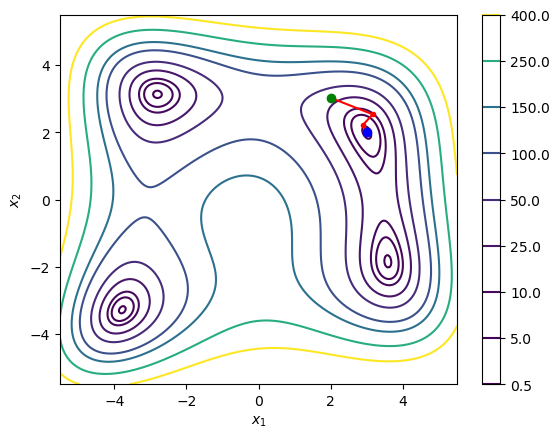


Función de Beale:
Resultado para x0 = [2. 3.], f(x0) = 3347.203125:
xk = [3.  0.5], k = 15, f(xk) = 1.3705908845074578e-18, convergió: True
Promedio de iteraciones algoritmo GC Newton = 1.0
Iteraciones algoritmo GC Newton = [1, 1, 1, 1, 1]


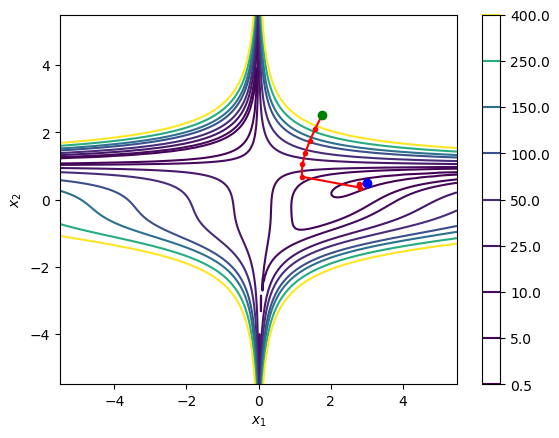


Función de Rosenbrock:
Resultado para x0 = [-1.2  1. ], f(x0) = 24.199999999999996:
xk = [1.         0.99999999], k = 63, f(xk) = 2.8357872857637625e-15, convergió: True
Promedio de iteraciones algoritmo GC Newton = 1.0
Iteraciones algoritmo GC Newton = [1, 1, 1, 1, 1]


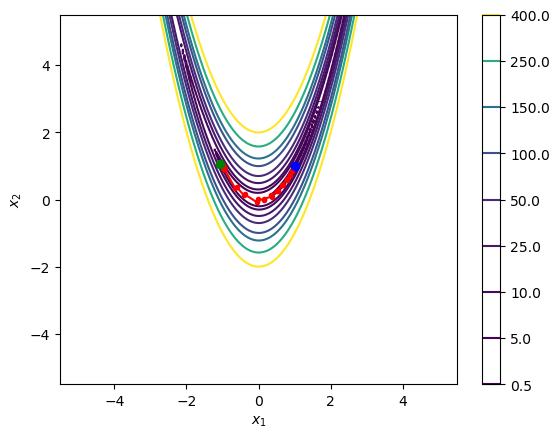


Resultado para x0 = [-1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.
 -1.2  1.  -1.2  1.  -1.2  1. ], f(x0) = 4597.999999999999:
xk = [0.99999756 1.00000485 0.99999055 1.00000905 0.99998222 1.00000707
 0.99996603 0.99998393 0.99991353 0.99988145 0.99970877 0.99946697
 0.99888535 0.99780736 0.99557509 0.99117554 0.98236712 0.96497251
 0.93099065 0.86638613], k = 5000, f(xk) = 0.00642362988045253, convergió: False
Promedio de iteraciones algoritmo GC Newton = 1.0
Iteraciones algoritmo GC Newton = [1, 1, 1, 1, 1]

Resultado para x0 = [-1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.
 -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.
 -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.
 -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1. ], f(x0) = 12221.000000000004:
xk = [1.00003090e+00 9.99922879e-01 1.00012204e+00 9.99833779e-01
 1.00020746e+00 9.99752261e-01 1.00028325e+00 9.99682072e-01
 1.00034602e+00 9.99626394e-01 1.

In [110]:
# Puntos iniciales para la función de Himmelblau
puntos_iniciales_himmelblau = [np.array([2.0, 4.0])]

# Puntos iniciales para la función de Beale
puntos_iniciales_beale = [np.array([2.0, 3.0])]

# Puntos iniciales para la función de Rosenbrock
puntos_iniciales_rosenbrock = [
    np.array([-1.2, 1.0]),
    np.array([-1.2 if i % 2 == 0 else 1.0 for i in range(20)]),
    np.array([-1.2 if i % 2 == 0 else 1.0 for i in range(50)])
]

# Epsilon de la máquina
epsilon_m = np.finfo(float).eps

# Configuración de tolerancia
tau = lambda n: np.sqrt(n) * epsilon_m**(1/3)

# Parámetros iniciales
alpha_0 = 1
rho = 0.5
c1 = 0.001

# Número máximo de iteraciones para el descenso máximo y la sección dorada
NMax = 5000
NBack = 500


# Probar con la función de Himmelblau
print("Función de Himmelblau:")
probar_newton(himmelblau, grad_himmelblau, hessian_himmelblau, puntos_iniciales_himmelblau)

# Probar con la función de Beale
print("Función de Beale:")
probar_newton(beale, grad_beale, hessian_beale, puntos_iniciales_beale)

# Probar con la función de Rosenbrock
print("Función de Rosenbrock:")
probar_newton(rosenbrock, grad_rosenbrock, hessian_rosenbrock, puntos_iniciales_rosenbrock)

## Ejercicio 2 

Programar las funciones que calcule el gradiente y la Hessiana usando el método
de diferencias finitas.

1. Programe la función que calcule una aproximación del gradiente de una función
   $f(\mathbf{x})$ en un punto $\mathbf{x}\in\mathbb{R}^n$ dado usando el esquema de 
   diferencias finitas hacia adelante    (Página 20 de la Clase 20).
   
- La función recibe como parámetros la función $f$, el punto $\mathbf{x}$ y
  el incremento $h$ y devuelve el arreglo de tamaño $n$ con las aproximaciones
  de  aproximaciones de las derivadas parciales en el punto $\mathbf{x}$.


In [131]:
def calculateGrad_Forward(f, x, h):
    grad = []
    n = len(x)
    for i in range(n):

        # Arreglo de unos
        ei = np.zeros(n)
        ei[i] = 1
        
        # Calculamos la derivada
        derivate = (f(x + h*ei) - f(x)) / h

        grad.append(derivate)

        return grad

2. Programe la función que calcule una aproximación de la Hessiana de una función
   $f(\mathbf{x})$ en un punto $\mathbf{x}\in\mathbb{R}^n$ dado usando el esquema de 
   diferencias finitas de la Página 22  de la Clase 20.

- La función recibe como parámetros la función $f$, el punto $\mathbf{x}$ y
  el incremento $h$ y devuelve una matriz simétrica de tamaño $n$ que tiene
  las aproximaciones de las segundas derivadas parciales de $f$  en el punto $\mathbf{x}$.

In [132]:
def calculateHess_Forward(f, x, h):
    # Declaraciones iniciales
    n = len(x)
    hess = np.zeros((n, n))

    # Doble ciclo para recorrer la matriz
    for i in range(n):
        for j in range(n):
            
            # Arreglos de unos
            ei = np.zeros(n)
            ej = np.zeros(n)
            ei[i] = 1
            ej[j] = 1

            # Calculamos la derivada
            derivate = (f(x + h*ei + h*ej) - f(x + h*ei) - f(x + h*ej) + f(x))/h**2

            hess[i, j] = derivate

    return hess

3. Modifique la función `errorRelativo_grad`  para reportar estadísticas del
   error relativo de la implementación del gradiente analítico `gradf` de 
   una función respecto al gradiente calculado con `autograd`, para que mida 
   el error relativo entre la función `gradf` y la aproximación del gradiente 
   usando diferencias finitas.
   Hay que agregar como parámetro de `errorRelativo_grad` el incremento $h$
   para que se pueda llamar la función del Punto 1.

4. Programar la función `errorRelativo_hess`, similar a la función del punto anterior,
   para que reporte estadísticas del error relativo entre una función que calcula
   la Hessiana de $f$ de manera analítica en un punto  $\mathbf{x}$ y la aproximación
   de la Hessiana en  $\mathbf{x}$ usando diferencias finitas.

In [133]:
def errorRelativo_grad(f, gradf, n, nt, h):
    ve = np.zeros(nt)
    print('\nErrores relativos en el cálculo del gradiente:')
    for it in range(nt):
        x0  = np.random.randn(n)
        g0  = gradf(x0) #Función analítica
        ga  = calculateGrad_Forward(f, x0, h)
        ve[it] = np.linalg.norm(g0-ga)/np.linalg.norm(ga)
    print('Min: %.2e   Media: %.2e    Max: %.2e' %(np.min(ve), np.mean(ve), np.max(ve)))


def errorRelativo_hess(f, hessf, n, nt, h):
    ve = np.zeros(nt)
    print('\nErrores relativos en el cálculo de la Hessiana:')
    for it in range(nt):
        x0  = np.random.randn(n)
        h0  = hessf(x0)
        ha  = calculateHess_Forward(f, x0, h)
        ve[it] = np.linalg.norm(h0-ha)/np.linalg.norm(ha)
    print('Min: %.2e   Media: %.2e    Max: %.2e' %(np.min(ve), np.mean(ve), np.max(ve)))

5. Pruebe las funciones `errorRelativo_grad` con cada una de las funciones 
   del Ejercicio 1 usando $h=10^{-5}, 10^{-6}, 10^{-7}, 10^{-8}$.
   ¿Cuál es el valor de $h$ que conviene usar para aproximar el gradiente y cuál
   para aproximar la Hessiana?

---

Probamos primero para las funciones cuadráticas

In [140]:
# Función para probar las funciones cuadráticas
def test_ErrorQuadratic(n, h, generate):

    # Generar A, b
    A, b = generate(n)

    # Generamos la función y su gradiente 
    f = lambda x: fG(x, A, b)
    gradf = lambda x: gradfG(x, A, b)
    hessf = lambda x: HessfG(x, A, b)

    for value in h:
        print(f"Valores función: n={n}, h ={value}")
        errorRelativo_grad(f, gradf, n, 10, value)
        errorRelativo_hess(f, hessf, n, 10, value)
    
    print()

In [141]:
# Prueba del algoritmo para f1
h = [1e-5, 1e-6, 1e-7, 1e-8]
for n in [10, 100]:
    test_ErrorQuadratic(n, h, generate_A1_b1)

Valores función: n=10, h =1e-05

Errores relativos en el cálculo del gradiente:
Min: 1.61e+00   Media: 4.85e+00    Max: 1.56e+01

Errores relativos en el cálculo de la Hessiana:
Min: 7.94e-06   Media: 3.23e-05    Max: 8.96e-05
Valores función: n=10, h =1e-06

Errores relativos en el cálculo del gradiente:
Min: 1.53e+00   Media: 6.93e+00    Max: 3.31e+01

Errores relativos en el cálculo de la Hessiana:
Min: 5.53e-04   Media: 3.20e-03    Max: 5.54e-03
Valores función: n=10, h =1e-07

Errores relativos en el cálculo del gradiente:
Min: 1.57e+00   Media: 1.10e+01    Max: 7.60e+01

Errores relativos en el cálculo de la Hessiana:
Min: 1.34e-01   Media: 2.51e-01    Max: 4.73e-01
Valores función: n=10, h =1e-08

Errores relativos en el cálculo del gradiente:
Min: 2.37e+00   Media: 1.94e+01    Max: 8.63e+01

Errores relativos en el cálculo de la Hessiana:
Min: 9.79e-01   Media: 9.99e-01    Max: 1.02e+00

Valores función: n=100, h =1e-05

Errores relativos en el cálculo del gradiente:
Min: 9.37e

In [136]:
# Prueba del algoritmo para f2
for n in [10, 100]:
    test_ErrorQuadratic(n, h, generate_A2_b2)

Valores función: n=10, h =1e-05

Errores relativos en el cálculo del gradiente:
Min: 9.95e-01   Media: 1.40e+01    Max: 1.09e+02

Errores relativos en el cálculo de la Hessiana:
Min: 1.57e-05   Media: 3.30e-05    Max: 7.56e-05
Valores función: n=10, h =1e-06

Errores relativos en el cálculo del gradiente:
Min: 1.50e+00   Media: 6.58e+00    Max: 3.66e+01

Errores relativos en el cálculo de la Hessiana:
Min: 1.04e-03   Media: 2.58e-03    Max: 6.34e-03
Valores función: n=10, h =1e-07

Errores relativos en el cálculo del gradiente:
Min: 2.13e+00   Media: 3.89e+01    Max: 3.39e+02

Errores relativos en el cálculo de la Hessiana:
Min: 3.05e-02   Media: 1.96e-01    Max: 5.00e-01
Valores función: n=10, h =1e-08

Errores relativos en el cálculo del gradiente:
Min: 1.12e+00   Media: 5.07e+00    Max: 1.87e+01

Errores relativos en el cálculo de la Hessiana:
Min: 9.43e-01   Media: 1.01e+00    Max: 1.08e+00
Valores función: n=100, h =1e-05

Errores relativos en el cálculo del gradiente:
Min: 7.09e+

Ahora probamos las otras funciones

In [142]:
# Función para probar las funciones cuadráticas
def test_Error(f, gradf, hessf, h):

    for value in h:
        print(f"Valores función: n={n}, h ={value}")
        errorRelativo_grad(f, gradf, 2, 10, value)
        errorRelativo_hess(f, hessf, 2, 10, value)
    
    print()

In [143]:
# Probar con la función de Himmelblau
print("Función de Himmelblau:")
test_Error(himmelblau, grad_himmelblau, hessian_himmelblau, h)

# Probar con la función de Beale
print("Función de Beale:")
test_Error(beale, grad_beale, hessian_beale, h)

# Probar con la función de Rosenbrock
print("Función de Rosenbrock:")
test_Error(rosenbrock, grad_rosenbrock, hessian_rosenbrock, h)

Función de Himmelblau:
Valores función: n=100, h =1e-05

Errores relativos en el cálculo del gradiente:
Min: 3.25e-01   Media: 3.89e+00    Max: 2.28e+01

Errores relativos en el cálculo de la Hessiana:
Min: 7.76e-06   Media: 2.10e-05    Max: 3.80e-05
Valores función: n=100, h =1e-06

Errores relativos en el cálculo del gradiente:
Min: 1.93e-02   Media: 1.12e+00    Max: 3.48e+00

Errores relativos en el cálculo de la Hessiana:
Min: 7.68e-04   Media: 1.87e-03    Max: 3.04e-03
Valores función: n=100, h =1e-07

Errores relativos en el cálculo del gradiente:
Min: 3.76e-01   Media: 2.02e+00    Max: 6.25e+00

Errores relativos en el cálculo de la Hessiana:
Min: 4.44e-02   Media: 1.41e-01    Max: 2.39e-01
Valores función: n=100, h =1e-08

Errores relativos en el cálculo del gradiente:
Min: 3.10e-01   Media: 2.18e+00    Max: 6.98e+00

Errores relativos en el cálculo de la Hessiana:
Min: 9.17e-01   Media: inf    Max: inf

Función de Beale:
Valores función: n=100, h =1e-05

Errores relativos en e

/var/folders/9t/s_zg1kn954l26k1btcnp7lfm0000gn/T/ipykernel_4727/3007504470.py:19: RuntimeWarning: divide by zero encountered in scalar divide
  ve[it] = np.linalg.norm(h0-ha)/np.linalg.norm(ha)


En general se observa un comportamiento de decremento en el error del gradiente cuando el valor de h se vuelve mas pequeño. El error de la hessiana en cambio es bastante grande conforme va aumentando h, curioso. La elección de h optima tiene que ser tal que mantenga los errores en equilibrio, es decir un error pequeño en la hessiana, causa un error grande en el gradiente. El valor de h depende de las necesidades del problema y de lo que se quiere calcular mejor. 

## Ejercicio 3

Seleccionar un artículo para el proyecto final.

- El proyecto final se puede presentar de manera individual o en equipo 
  formado por dos estudiantes.
- La entrega del proyecto consiste programar el algoritmo descrito 
  en el artículo seleccionado y realizar pruebas para reproducir algunos resultados
  presentados en el artículo o diseñar los experimentos de prueba. El objetivo es
  mostrar las ventajas o limitaciones que tiene el algoritmo propuesto.
- Es válido delimitar el alcance, de manera que si aparecen varios algoritmos
  en el artículo, se puede seleccionar alguno de ellos para su implementación y validación.
- Hay que elaborar un reporte en el que se dé una introducción, 
  algunos fundamentos teóricos, el planteamiento del problema, la descripción del algoritmo, 
  los resultados obtenidos y las conclusiones.
- Hay que hacer una presentación de unos 15 minutos en el día acordado y 
  entregar el reporte, el código y las pruebas realizadas.
- Se puede entregar un notebook como el reporte y usarlo en la presentación,
  para que no tener que elaborar un documento con el reporte, otro con el script 
  del código y pruebas y otro para la presentación.
- Habrá dos fechas de entrega. La primera fecha es para los estudiantes de posgrado 
  que será entre el 27 de mayo y el 4 de junio. La segunda fecha es para los estudiantes 
  de licenciatura que será entre el 3 de junio y el 10 de junio.
- Si el equipo está formado por un estudiante de licenciatura y otro de posgrado
  tendrá que presentar el proyecto en la primera fecha.
- Para la selección se puede tomar uno de los artículos de la lista 
  que se presenta a continuación. 
- Estos artículos son una referencia. También pueden proponer algún artículo adicional,
  pero recomienda que cuiden que para entenderlo no tengan que revisar otras fuentes
  o que tengan que implementar algoritmos que requieran de temas que no fueron cubiertos
  en el curso y que les consuma demasiado tiempo hacer esa revisión, por ejemplo, 
  en temas de optimización combinatoria, entera, mixta, multiobjetivo, etc.

1. Escriba el nombre de los miembros del equipo junto con el nombre del programa académico.
2. Escriba el título del artículo seleccionado
3. Si no es un artículo de la lista o que esté en el Classroom, agregue el PDF
   como parte de la entrega de la Tarea 7.

1. Nombre de los integrantes del equipo:
+ Gonzales Valadez Ulises Aldair
+ Segura Gómez Guillermo

2. Titulo artículo: **Globally linearly convergent nonlinear conjugate gradients withoutWolfe line search**
